In [1]:
import numpyNET
from numpyNET.train import train, predict
from numpyNET.nn import Model
from numpyNET.layers import Dense, Tanh, ReLU, Sigmoid
from numpyNET.optimizer import SGD

import numpy as np
from numpy.random import seed
seed(13)

import matplotlib.pyplot as plt

## Testing on the XOR function

We use XOR because it is the canonical example of a function that cannot be trained by a simple linear model.

#### XOR truth-table:

| A | B | A `XOR` B |
| --- | --- | --- |
| 0 | 0 | **0** |
| 0 | 1 | **1** |
| 1 | 0 | **1** |
| 1 | 1 | **0** |

In [2]:
model = Model([
    Dense(input_size=2, output_size=3),
    Sigmoid(),
    Dense(input_size=3, output_size=1),
    Sigmoid()
])

In [3]:
xor_X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

xor_Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# This will not work:
# xor_Y = np.array([0, 1, 1, 0])

0 0.5677154880317582
50 1.839784795400201e-05
100 2.786678423245814e-06
150 5.277789266622691e-06
200 1.5628553996357639e-06
250 1.4458821618887688e-06
300 0.0005463726109066055
350 0.0002342655177764312
400 0.00016613249117245323
450 0.00013091783814805214


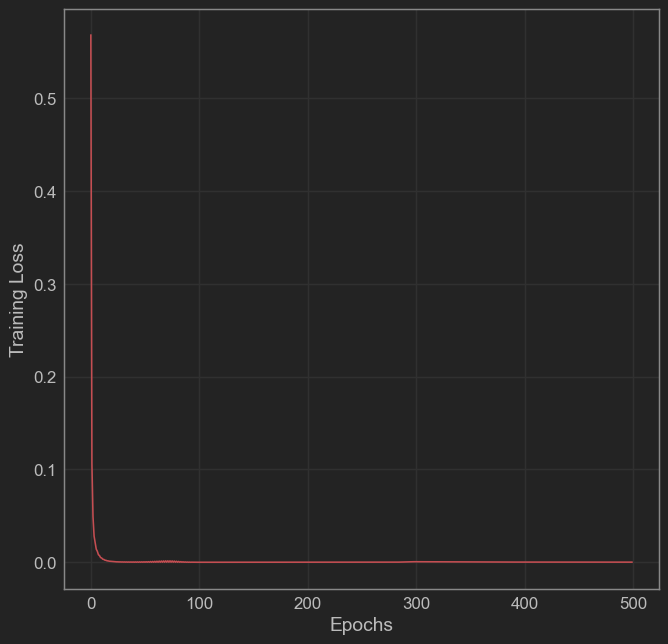

In [4]:
history = train(model, xor_X, xor_Y, plotting=True, epochs=500, optimizer=SGD(learn_rate=1.3))

In [5]:
for x, y in zip(xor_X, xor_Y):
    predicted = model.feed_forward(x)
    print(x, predicted, y)

[0 0] [0.0270789] [0]
[0 1] [0.93422328] [1]
[1 0] [0.94097606] [1]
[1 1] [0.07688645] [0]


## Testing on a similar data distribution:

For values between 0 and 1, the `model` shall return `1` when **both** `features` are greater than `0.5` or are less than `0.5`

Else, model returns `0`.

In [6]:
def create_dataset(N: int):
    dataset = np.random.rand(N, 3)
    
    # For training:
    features = dataset[:, :2]
    labels = np.reshape(dataset[:, 2], (-1, 1))
    
    # For plotting:
    zero = []
    one = []
    
    for feature in dataset:
#         print(i)
    #     print(feature)
        if ((feature[0] >= 0.5) and (feature[1] >= 0.5)) or ((feature[0] < 0.5) and (feature[1] < 0.5)):
            feature[2] = 1
            one.append(np.array([feature[0], feature[1]]))
        elif ((feature[0] >= 0.5) and (feature[1] < 0.5)) or ((feature[0] < 0.5) and (feature[1] >= 0.5)):
            feature[2] = 0
            zero.append(np.array([feature[0], feature[1]]))
        else: print(f"Feature: {feature} is invalid.")
    
    zero = np.array(zero)
    one = np.array(one)

    print(f"{zero.shape[0]} training features of class 0")
    print(f"{one.shape[0]} training features of class 1")
    
    return features, labels, zero, one

In [7]:
TRAIN_SET_SIZE = 256
features, labels, zero, one = create_dataset(256)

126 training features of class 0
130 training features of class 1


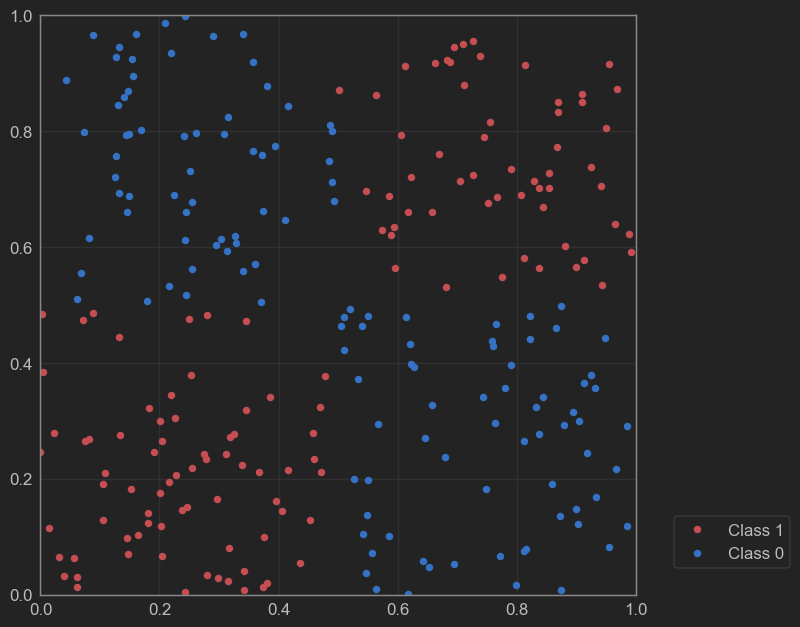

In [8]:
plt.figure(figsize=(8,8), dpi=96)
plt.plot(one[:, 0], one[:, 1], 'ro', zero[:, 0], zero[:, 1], 'bo')
plt.legend(["Class 1", "Class 0"], bbox_to_anchor =(1.05, 0.15), ncol = 1)
plt.axis([0, 1, 0, 1])
plt.show()

In [9]:
model_ = Model([
    Dense(input_size=2, output_size=3),
    Sigmoid(),
    Dense(input_size=3, output_size=1),
    Sigmoid()
])

0 3.848887968244721
150 0.3218237462568915
300 0.9867243819957098
450 0.2781085290431682
600 0.5390931429703715
750 0.6228152756987365
900 1.239672746915761
1050 1.0364181547019926
1200 0.4813270994441724
1350 0.43102090699240586


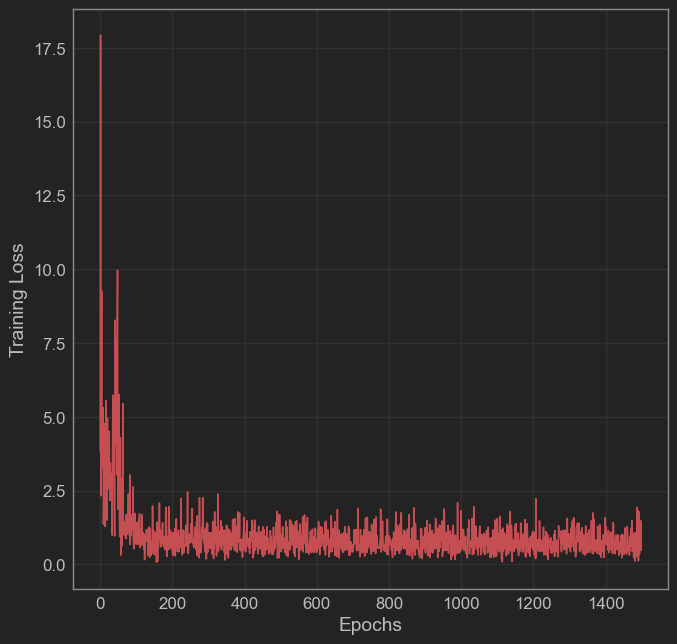

In [10]:
history = train(model_, features, labels, plotting=True, epochs=1500, optimizer=SGD(learn_rate=0.29))

In [11]:
wrong = np.sum(np.round_(np.abs(predict(model_, features) - labels)))
train_acc = 1.0 - (wrong / TRAIN_SET_SIZE)
print(f"Model Training Accuracy: {100*train_acc}")

Model Validation Accuracy: 93.359375


### Create a testing paradigm

In [12]:
TEST_SET_SIZE = 64
_, _, test_zeros, test_ones = create_dataset(TEST_SET_SIZE)

31 training features of class 0
33 training features of class 1


In [13]:
predicted_zeros = predict(model_, test_zeros)
predicted_ones = predict(model_, test_ones)

In [14]:
wrong_zeros = []
num_wrong_zeros = 0

right_zeros = []
num_right_zeros = 0

wrong_ones= []
num_wrong_ones = 0

right_ones = []
num_right_ones = 0

val_acc = 1.0

for x, y in zip(test_zeros, predicted_zeros):
    if y >= 0.5:
        val_acc -= 1.0 / TEST_SET_SIZE
        num_wrong_zeros += 1
        wrong_zeros.append(np.concatenate((x, y)))
    else:
        num_right_zeros += 1
        right_zeros.append(np.concatenate((x, y)))

for x, y in zip(test_ones, predicted_ones):
    if y < 0.5:
        val_acc -= 1.0 / TEST_SET_SIZE
        num_wrong_ones += 1
        wrong_ones.append(np.concatenate((x, y)))
    else:
        num_right_ones += 1
        right_ones.append(np.concatenate((x, y)))

wrong_zeros = np.array(wrong_zeros)
right_zeros = np.array(right_zeros)
wrong_ones = np.array(wrong_ones)
right_ones = np.array(right_ones)
wrong_ones

array([[5.60458177e-01, 8.77680092e-01, 1.35181050e-01],
       [9.79552342e-01, 5.65485126e-01, 2.69612846e-01],
       [5.05661431e-01, 9.74645700e-01, 2.07551036e-06],
       [4.89219039e-01, 2.97959455e-01, 3.89064975e-02]])

In [15]:
print(f"{num_wrong_zeros} examples of class '0' misclassified")
print(f"{num_right_zeros} examples of class '0' correctly classified")
print(f"{num_wrong_ones} examples of class '1' misclassified")
print(f"{num_right_ones} examples of class '1' correctly classified")
print()
print(f"Model Validation Accuracy: {100*val_acc}")

2 examples of class '0' misclassified
29 examples of class '0' correctly classified
4 examples of class '1' misclassified
29 examples of class '1' correctly classified

Model Validation Accuracy: 90.625


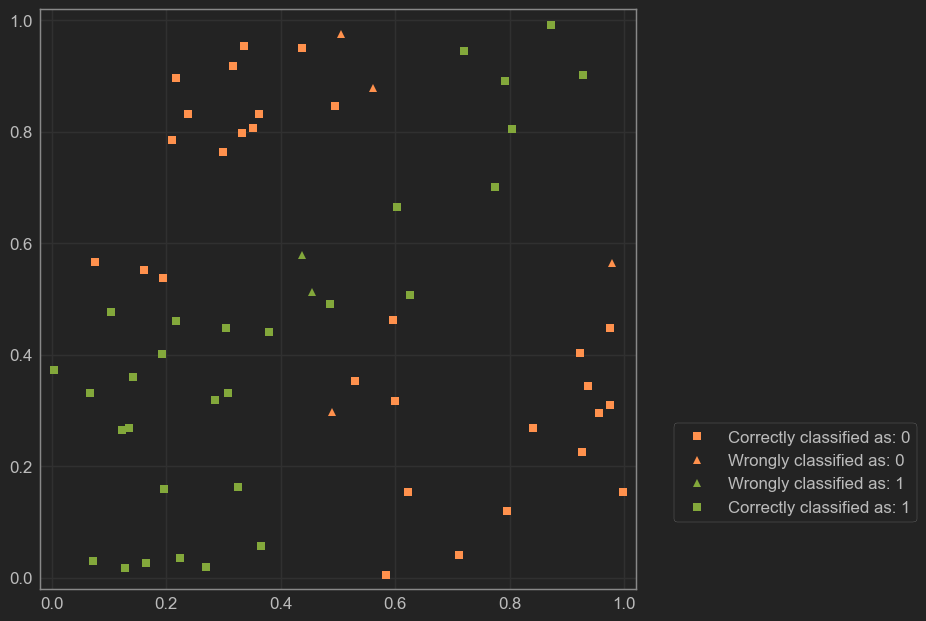

In [16]:
plt.figure(figsize=(8,8), dpi=96)
plt.plot(right_zeros[:, 0], right_zeros[:, 1], 'ys')
plt.plot(wrong_ones[:, 0], wrong_ones[:, 1], 'y^')
plt.plot(wrong_zeros[:, 0], wrong_zeros[:, 1], 'g^')
plt.plot(right_ones[:, 0], right_ones[:, 1], 'gs')
plt.legend(["Correctly classified as: 0",
            "Wrongly classified as: 0",
            "Wrongly classified as: 1",
            "Correctly classified as: 1"], bbox_to_anchor =(1.05, 0.3), ncol = 1)
plt.axis([-0.02, 1.02, -0.02, 1.02])
plt.show()